# Partie pratique: Simulation de la Distribuation Gamma

## Objectif:
L'objectif de cette simulation est :
- Exploiter la distribution de Gamma pour prédire la probabilité de retard d'un vole aérien a une durée donnée. 
- Calculer les paramètres $α$ et $β$ de la `loi gamma` à partir des données collectees concernant le `retard des vol aérien d'arrivée aux État Unis`.

- Visualiser la Fonction de Densité $f_{α,β}$. 
$$\begin{align*}  
\;  f_{α,β}(x) &= \frac{x^{(α-1)}e^{\frac{x}{β}}}{β^{\alpha}\Gamma^{\alpha}} \tag{1}  \; 
\end{align*}$$

- Visualiser la Fonction de Densité $F$ de la loi gamma.
$$\begin{align*}  
        \;  F(x) &= \int_0^x f_{α,β}(x) \,dx  \tag{2}  \; 
\end{align*}$$

## Description du Dataframe - (Table de Donnée) utilisée:

Le `Dataframe` se compose des détails d'arrivée et de départ de tous les vols aux États-Unis de Janvier 2008 à Decembre 2008. Il s'agit d'un grand ensembles des donnees: 
- Il y'a presque plus de 1.5 millions d'enreginstrements au total.

Il est d'origine du Bureau de Transportation Statistics *(BTS)* du Département américain des transports *(DOT)* qu'ont collectee ces enregistrements pour le but de suivre la ponctualité des vols interieurs opérés par les grands transporteurs aériens pour l'annee 2008.
Ces enregistrements contients des informations tres utiles sur : 
- Identifiants des vols 
- Nombre de vols a l'heurs / jour / mois
- Nombre des vols annulees 
- Nombre des vols retardees 
- ....

## Outiles et Packages:

Dans cette simulation nous utilisirons : 
- `NumPy`, une bibliothèque populaire pour le calcul scientifique
- `Matplotlib`, une bibliothèque populaire pour tracer des données
- `Pandas`, bibliothèque populaire en Python pour la manipulation et l'analyse de données
- `scipy.stats`, un module de la bibliothèque SciPy qui fournit des fonctions statistiques et des distributions de probabilité

In [1]:
#importer les packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

## Énoncé du problème

Ces lignes de code permettent de lire un fichier `CSV - Comma-Separated Values` contenant des données sur les vols et d'effectuer une vérification sur la colonne "ArrDelay" pour compter le nombre de valeurs manquantes (NaN).

- `df = pd.read_csv('fly.csv')` : permet de lire le fichier *CSV* appelé **fly.csv** et stocker les données dans un type de structure de donneés appellée  DataFrame nommé *df*. 
- `df['ArrDelay']` : Cette partie du code sélectionne la colonne **ArrDelay** du DataFrame **df**.
- `isnull()` : Méthode qui renvoie une valeur booléenne *(True/False)* pour chaque élément de la colonne. La valeur est True si l'élément est manquant *(NaN)*, sinon False.
- `sum()`, Méthode qui calcule la somme des valeurs booléennes. Lorsqu'elle est utilisée après `isnull()`, elle renvoie le nombre total de valeurs manquantes dans la colonne **"ArrDelay"**.

In [2]:
# lire les donnees a partir du fichier 'fly.csv' d'extension .csv
df=pd.read_csv('fly.csv')
# calculer le nombre des cellule vide - NULL
print('le nombre des cellules null est : ' + str(df['ArrDelay'].isnull().sum()))

le nombre des cellules null est : 8387


<br><br>
`df.info()`, Methode d'obtention des informations détaillées sur un DataFrame, y compris: 
- le nombre total d'entrées, 
- le type de données de chaque colonne 
- le nombre de valeurs non nulles dans chaque colonne
- la quantité du memoire consacrée

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

<br><br>
`df.select_dtypes(include='object').nunique()` va nous permettre de determiner le nombre des valeurs unique a partir de tous les columns de types *object*.

In [4]:
df.select_dtypes(include='object').nunique()

UniqueCarrier         20
TailNum             5366
Origin               303
Dest                 304
CancellationCode       4
dtype: int64

<br>
Le code ci-dessous extrait les colonnes: 

- Year, 
- Month, 
- DayofMonth,
- ArrDelay

du DataFrame df et les assigne à un nouveau DataFrame appelé retard.

In [5]:
retard = df[['Year','Month','DayofMonth','ArrDelay', 'DepDelay']]

<br><br>
`retard.head()`, cela affiche les cinq premières lignes du DataFrame retard, qui nous aide d'obtenir un aperçu rapide et globales sur les données existes.

In [6]:
retard.head()

,Year,Month,DayofMonth,ArrDelay,DepDelay
0,2008,1,3,-14.0,8.0
1,2008,1,3,2.0,19.0
2,2008,1,3,14.0,8.0
3,2008,1,3,34.0,34.0
4,2008,1,3,11.0,25.0




`retard.describe()`, cela nous donne une vision globale au propos nos donnees graces aux resultas statistiques.

In [7]:
retard.describe()

,Year,Month,DayofMonth,ArrDelay,DepDelay
count,1936758.0,1.936758e+06,1.936758e+06,1.928371e+06,1.936758e+06
mean,2008.0,6.111106e+00,1.575347e+01,4.219988e+01,4.318518e+01
std,0.0,3.482546e+00,8.776272e+00,5.678472e+01,5.340250e+01
min,2008.0,1.000000e+00,1.000000e+00,-1.090000e+02,6.000000e+00
25%,2008.0,3.000000e+00,8.000000e+00,9.000000e+00,1.200000e+01
50%,2008.0,6.000000e+00,1.600000e+01,2.400000e+01,2.400000e+01
75%,2008.0,9.000000e+00,2.300000e+01,5.600000e+01,5.300000e+01
max,2008.0,1.200000e+01,3.100000e+01,2.461000e+03,2.467000e+03



Ces lignes de code effectuent les opérations suivantes :

- `retard.dropna(inplace=True)`, supprition les lignes du DataFrame *retard* qui contiennent des valeurs manquantes **(NaN)** dans l'une des colonnes. L'argument **inplace=True** est utilisé pour appliquer les modifications directement au DataFrame.

- `retard['ArrDelay'].isnull().sum()`, Vérification du nouveau s'il y a des valeurs manquantes dans la colonne "ArrDelay" du DataFrame retard. 




In [8]:
retard.dropna(inplace=True)
retard['ArrDelay'].isnull().sum()

C:\Users\simoc\AppData\Local\Temp\ipykernel_12852\1547718528.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retard.dropna(inplace=True)


0

<br>

`retard.shape`, Obtention de la taille du DataFrame **retard**: 
- (1928371, 4), $(1.928.341 lignes, 4 colonnes)$

In [9]:
lignes = retard.shape[0]
column = retard.shape[1]
print("(" + str(lignes) +  " lignes, " + str(column) + " columns)")

(1928371 lignes, 5 columns)


### Calcule de l'Esperance et de Variance:


Voici ce que chaque ligne de code fait :
- `esperance = np.mean(retard['ArrDelay'])`, Calculee du moyenne de la colonne **ArrDelay** dans le DataFrame retard.
- `variance = np.var(retard['ArrDelay'])`, Calculer la variance de la colonne **ArrDelay** dans le DataFrame retard. 


In [10]:
esperance = np.mean(retard['ArrDelay'])
variance = np.var(retard['ArrDelay'])
print("Moyenne : ", esperance)
print("Variance : ", variance)

Moyenne :  42.19988477321014
Variance :  3224.5022011009587


### Calcule des Paramètres de la Distribution Gamma :


Ces lignes de code calculent les paramètres de la **loi gamma**, à savoir: 
- `Echelle`- $\theta$, 
$$\begin{align*}  
\;  \theta &= \frac{Var(ArrDelay)}{Esp(ArrDelay)} \tag{3}  \; 
\end{align*}$$

- `Forme` - $\alpha$, 
$$\begin{align*}  
\;  \alpha &= \frac{Esp(ArrDelay)^2}{Var(ArrDelay)} \tag{3}  \; 
\end{align*}$$

à partir de **l'espérance** (moyenne) et de **la variance** de la colonne **"ArrDelay"** dans le DataFrame retard. Les résultats sont affichés en sortie comme suit :



In [11]:
θ = variance / esperance
a = (esperance**2) / variance
print("θ : ", θ)
print("a : ", a)

θ :  76.4102134029517
a :  0.5522806820426963


### Visualisation de la Fonction Densité et de Repartition

Ce code trace: 
- la Fonction de Densité $f_{α,β}$.
- La Fonction de Répartition $F$ de la Distribution Gamma.

en se basant sur les parametres $\theta, \alpha$ estimée.

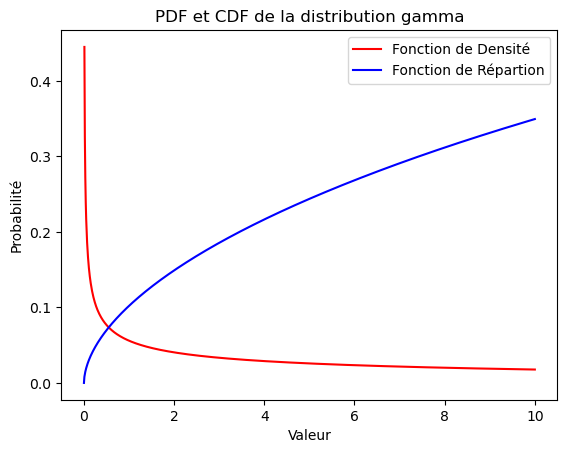

In [12]:
# Paramètres estimés de la loi gamma

# Plage de valeurs
x = np.linspace(0, 10, 1000)

# Tracé de la fonction de densité de probabilité (PDF)
pdf = stats.gamma.pdf(x, a, scale=θ)
plt.plot(x, pdf, 'r-', label='Fonction de Densité')

# Tracé de la fonction de répartition (CDF)
cdf = stats.gamma.cdf(x, a, scale=θ)
plt.plot(x, cdf, 'b-', label='Fonction de Répartion')

# Étiquettes et titre du graphique
plt.xlabel('Valeur')
plt.ylabel('Probabilité')
plt.title('PDF et CDF de la distribution gamma')

# Légende
plt.legend()

# Affichage du graphique
plt.show()

Voici ce que chaque partie du code fait :
- `x = np.linspace(0, 10, 1000)`, Création un tableau de *1000* valeurs équidistantes entre $[0, 10]$. Ces valeurs seront utilisées comme points de données pour tracer la $f_{α,β}$. et la $F$.
- `pdf = stats.gamma.pdf(x, a, scale=θ)`, Calculation des valeurs de la $f_{α,β}$ de la distribution gamma. Les paramètres $\alpha$ et $\theta$ sont passés à cette fonction pour spécifier la forme et l'échelle de la Distribution Gamma.
- `plt.plot(x, pdf, 'r-', label='Fonction de Densité')`, Tracage du courbe de la $f_{α,β}$. L'argument **r-** spécifie que la courbe sera tracée en rouge avec une ligne pleine. L'étiquette 'Fonction de Densité' est spécifiée pour la légende.
- `cdf = stats.gamma.cdf(x, a, scale=θ)`, Calculation les valeurs de la $F$. de la Distribution Gamma .Les paramètres $\alpha$ et $\theta$ sont passés à cette fonction pour spécifier la forme et l'échelle de la distribution gamma. 
- `plt.plot(x, cdf, 'b-', label='Fonction de Répartition')`, Cette ligne de code trace la courbe de la $F$. L'argument **'b-'** spécifie que la courbe sera tracée en bleu avec une ligne pleine. L'étiquette 'Fonction de Répartition' est spécifiée pour la légende.
- `plt.xlabel('Valeur')`, Ajoute d'une étiquette à l'axe des abscisses du graphique, indiquant la valeur.
- `plt.ylabel('Probabilité')`, Ajoute une étiquette à l'axe des ordonnées du graphique, indiquant la probabilité.
- `plt.title('PDF et CDF de la distribution gamma')`, Ajoute un titre au graphique, indiquant le type de distribution et les fonctions tracées.
- `plt.legend()`,  Ajoute une légende au graphique, affichant les étiquettes des courbes tracées.
- `plt.show()`, Affichage du graphique.

### Calcule du Probabilite pour une Durée de retard Donnée:


Cette fonction, calculer_probabilite_retard, est utilisée pour calculer la probabilité d'avoir un retard inférieur à une valeur donnée, en utilisant les paramètres de forme (a) et d'échelle (θ) de la loi gamma.

Voici ce que chaque partie du code fait :

- **def calculer_probabilite_retard(retard, a, θ)**: : Cette ligne de code définit la fonction **calculer_probabilite_retard** qui prend trois paramètres en entrée : **retard**, représentant le retard pour lequel nous voulons calculer la probabilité, **a**, le paramètre de forme de la loi **gamma**, et **θ**, le paramètre d'échelle de la loi gamma.
- **prob = stats.gamma.cdf(retard, a, scale=θ)** : Cette ligne de code utilise la fonction **stats.gamma.cdf()** de la bibliothèque **SciPy** pour calculer la fonction de répartition **(CDF)** de la loi **gamma** pour la valeur retard, en utilisant les paramètres a et θ. La probabilité calculée est assignée à la variable prob.


In [ ]:

def calculer_probabilite_retard(retard, a, θ):
    prob = stats.gamma.cdf(retard, a, scale=θ)
    return prob

# Exemple d'utilisation de la fonction
retard = float(input())

probabilite = calculer_probabilite_retard(retard, a, θ)
print("La probabilité d'avoir un retard inferieur à", retard, "est:", probabilite)
